In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from astropy.table import Table

In [0]:
url = 'https://raw.githubusercontent.com/firdhoyuwandha/data/master/Inflasi.csv'
d = pd.read_csv(url)

In [0]:
df=pd.DataFrame(d)

In [0]:
df['Inflasi']=df['Inflasi'].str.replace(r'%', r'').astype('float') / 100.0

In [5]:
df.tail()

,Month,Inflasi
194,April 2003,0.0762
195,Maret 2003,0.0717
196,Februari 2003,0.0760
197,Januari 2003,0.0868
198,Desember 2002,0.0000


In [0]:
df_year={}
a=0
b=6
for x in range(17):
  temp=df[a:b]
  f=2019-x
  df_year['{0}'.format(f)]=temp
  if x==0:
    a=a+6
  else:
    a=a+12
  b=b+12

In [0]:
df_month={}
for x in range(12):
  temp=df[x:201:12]
  if x<6:
    f=6-x
  else:
    f=18-x
  df_month["{0}".format(f)]=temp

# All

In [0]:
mean=df.mean()
std=df.std()
skewness=df.skew()
max_note,max_=df.loc[df['Inflasi'].idxmax()]
min_note,min_=df.loc[df['Inflasi'].idxmin()]

In [9]:
a = ['Mean', 'Standart Deviation', 'Skewness', 'Maximum', 'Minimum']
b = [mean.values, std.values, skewness.values, max_, min_]
c = [None, None, None, max_note, min_note]
t1 = Table([a, b, c], names = ('Analysis', 'Value', 'Note'))
t1

Analysis,Value,Note
str18,object,object
Mean,[0.06314724],None
Standart Deviation,[0.03316154],None
Skewness,[1.65143045],None
Maximum,0.1838,Nopember 2005
Minimum,0.0,Desember 2002


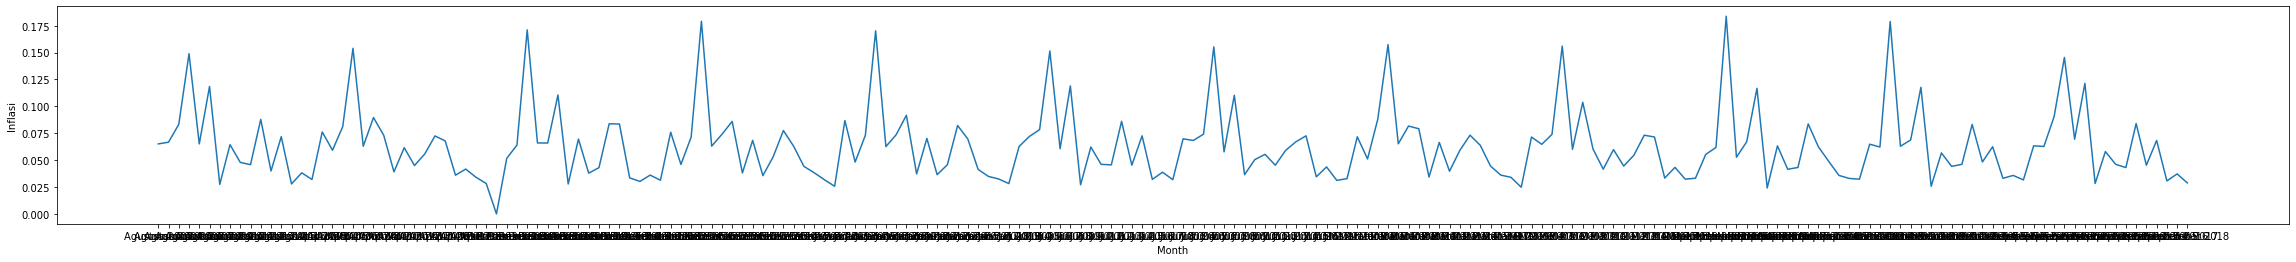

In [10]:
fig_dims = (40, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.lineplot(x = "Month", y = "Inflasi", ax=ax, data=df)

# By years

In [0]:
y_ = []
meanby = []
stdby = []
skewnessby = []
maxby_= []
maxby_note = []
minby_ = []
minby_note = []

for i in range(17):
  year=i+2003
  y_.append(year)
  year_=str(year)
  temp=df_year[year_].mean()
  meanby.append(temp.values)
  temp=df_year[year_].std()
  stdby.append(temp.values)
  temp=df_year[year_].skew()
  skewnessby.append(temp.values)
  temp, temp1=df_year[year_].loc[df_year[year_]['Inflasi'].idxmax()]
  maxby_note.append(temp)
  maxby_.append(temp1)
  temp, temp1=df_year[year_].loc[df_year[year_]['Inflasi'].idxmin()]
  minby_note.append(temp)
  minby_.append(temp1)

In [12]:
print('Year      Mean            Std           Skewness                       Maximum                            Minimum\n')
for i in range(17):
  print(y_[i], '|', meanby[i], '|', stdby[i], '|', skewnessby[i], '|', maxby_[i], '=>', maxby_note[i], '|', minby_[i], '=>', minby_note[i])

Year      Mean            Std           Skewness                       Maximum                            Minimum

2003 | [0.0679] | [0.00959555] | [0.16571264] | 0.0868 => Januari 2003 | 0.0516 => Desember 2003
2004 | [0.060575] | [0.00810366] | [-0.72493327] | 0.07200000000000001 => Juli 2004 | 0.046 => Februari 2004
2005 | [0.104025] | [0.04503478] | [1.27543996] | 0.1838 => Nopember 2005 | 0.07150000000000001 => Februari 2005
2006 | [0.13331667] | [0.04491687] | [-1.17272015] | 0.17920000000000003 => Februari 2006 | 0.0527 => Nopember 2006
2007 | [0.06404167] | [0.00356459] | [-0.13136623] | 0.0695 => September 2007 | 0.057699999999999994 => Juni 2007
2008 | [0.10308333] | [0.01831928] | [-0.74724316] | 0.12140000000000001 => September 2008 | 0.0736 => Januari 2008
2009 | [0.04895] | [0.02689037] | [0.58260601] | 0.0917 => Januari 2009 | 0.0241 => Nopember 2009
2010 | [0.05125] | [0.01260934] | [-0.03401121] | 0.0696 => Desember 2010 | 0.034300000000000004 => Maret 2010
2011 | [0.0

Text(0, 0.5, 'Average of Inflation')

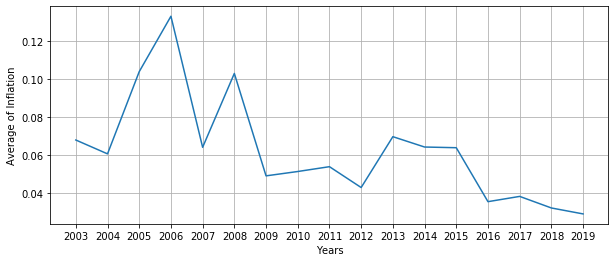

In [13]:
plt.figure(figsize=(10,4))
plt.plot(range(2003,2020), meanby)
plt.grid(True)
plt.xticks(range(2003,2020))
plt.xlabel('Years')
plt.ylabel('Average of Inflation')

# By months

In [0]:
m_ = []
meanbm = []
stdbm = []
skewnessbm = []
maxbm_= []
maxbm_note = []
minbm_ = []
minbm_note = []
for i in range(12):
  month=i+1
  m_.append(month)
  month_=str(month)
  temp=df_month[month_].mean()
  meanbm.append(temp.values)
  temp=df_month[month_].std()
  stdbm.append(temp.values)
  temp=df_month[month_].skew()
  skewnessbm.append(temp.values)
  temp, temp1=df_month[month_].loc[df_month[month_]['Inflasi'].idxmax()]
  maxbm_note.append(temp)
  maxbm_.append(temp1)
  temp, temp1=df_month[month_].loc[df_month[month_]['Inflasi'].idxmin()]
  minbm_note.append(temp)
  minbm_.append(temp1)

In [16]:
print('Month      Mean         Std           Skewness        Maximum               Minimum\n')
for i in range(12):
  print(m_[i], '|', meanbm[i], '|', stdbm[i], '|', skewnessbm[i], '|', maxbm_[i], '=>', maxbm_note[i], '|', minbm_[i], '=>', minbm_note[i])

Month      Mean         Std           Skewness        Maximum               Minimum

1 | [0.06381176] | [0.03432974] | [1.90757784] | 0.1703 => Januari 2006 | 0.0282 => Januari 2019
2 | [0.06301765] | [0.03510622] | [2.36007017] | 0.17920000000000003 => Februari 2006 | 0.025699999999999997 => Februari 2019
3 | [0.06295882] | [0.03086384] | [1.75281619] | 0.1574 => Maret 2006 | 0.0248 => Maret 2019
4 | [0.06341765] | [0.02946846] | [1.799527] | 0.154 => April 2006 | 0.028300000000000002 => April 2019
5 | [0.06340588] | [0.0302887] | [1.91697541] | 0.156 => Mei 2006 | 0.0323 => Mei 2018
6 | [0.06259412] | [0.03106784] | [1.88256876] | 0.1553 => Juni 2006 | 0.031200000000000002 => Juni 2018
7 | [0.06449375] | [0.0332539] | [1.40063221] | 0.1515 => Juli 2006 | 0.0271 => Juli 2009
8 | [0.0644375] | [0.0333696] | [1.24175533] | 0.149 => Agustus 2006 | 0.0275 => Agustus 2009
9 | [0.063925] | [0.03324552] | [1.23237491] | 0.14550000000000002 => September 2006 | 0.028300000000000002 => Septembe

Text(0, 0.5, 'Average of Inflation')

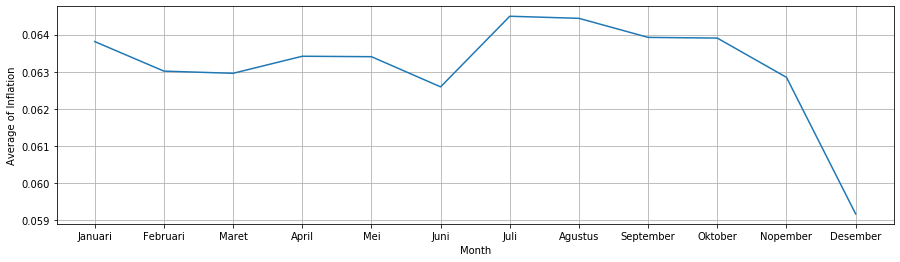

In [17]:
month = ['Januari', 'Februari', 'Maret', 'April', 'Mei', 'Juni', 'Juli', 'Agustus', 'September', 'Oktober', 'Nopember', 'Desember']
plt.figure(figsize=(15,4))
plt.plot(month, meanbm)
plt.grid(True)
plt.xlabel('Month')
plt.ylabel('Average of Inflation')

# Polynomial Regression

In [18]:
df2=df
df2['Inflasi']=df2['Inflasi'].values[::-1]
df2['Month']=df2['Month'].values[::-1]
df2.head()

,Month,Inflasi
0,Desember 2002,0.0000
1,Januari 2003,0.0868
2,Februari 2003,0.0760
3,Maret 2003,0.0717
4,April 2003,0.0762


In [0]:
X=df2.index
y=df2['Inflasi']

In [0]:
X=np.array(X)
y=np.array(y)
X2=X.reshape(-1,1)

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
"""
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X2)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

def disp_polyreg():
  plt.figure(figsize=(10,4))
  plt.scatter(X2, y, color='red')
  plt.plot(X2, pol_reg.predict(poly_reg.fit_transform(X2)), color='blue')
  plt.title('Polynomial Regression of Inflation Data')
  plt.xlabel('Month (start from Desember 2002)')
  plt.ylabel('Inflation Rate')
  plt.show()
  return
disp_polyreg()
"""

"\npoly_reg = PolynomialFeatures(degree=4)\nX_poly = poly_reg.fit_transform(X2)\npol_reg = LinearRegression()\npol_reg.fit(X_poly, y)\n\ndef disp_polyreg():\n  plt.figure(figsize=(10,4))\n  plt.scatter(X2, y, color='red')\n  plt.plot(X2, pol_reg.predict(poly_reg.fit_transform(X2)), color='blue')\n  plt.title('Polynomial Regression of Inflation Data')\n  plt.xlabel('Month (start from Desember 2002)')\n  plt.ylabel('Inflation Rate')\n  plt.show()\n  return\ndisp_polyreg()\n"

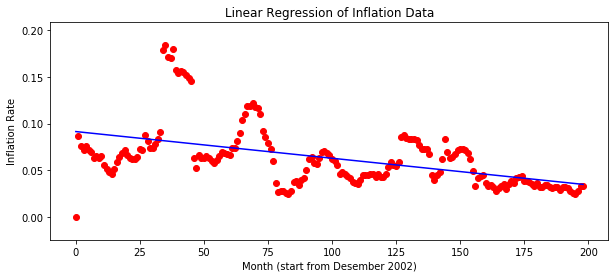

0.24532796735710072


In [35]:
linreg = LinearRegression()
linreg.fit(X2,y)
y_pred = linreg.predict(X2)

plt.figure(figsize=(10,4))
plt.scatter(X2, y, color='red')
plt.plot(X2, y_pred, color='blue')
plt.title('Linear Regression of Inflation Data')
plt.xlabel('Month (start from Desember 2002)')
plt.ylabel('Inflation Rate')
plt.show()
print(r2_score(y,y_pred))

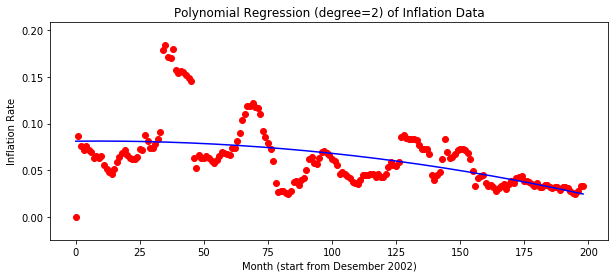

0.26528351542302464


In [39]:
polyreg2 = PolynomialFeatures(degree=2)
X_poly = polyreg2.fit_transform(X2)

linreg2 = LinearRegression()
linreg2.fit(X_poly, y)
y_pred = linreg2.predict(X_poly)

plt.figure(figsize=(10,4))
plt.scatter(X2, y, color='red')
plt.plot(X2, y_pred, color='blue')
plt.title('Polynomial Regression (degree=2) of Inflation Data')
plt.xlabel('Month (start from Desember 2002)')
plt.ylabel('Inflation Rate')
plt.show()
print(r2_score(y,y_pred))

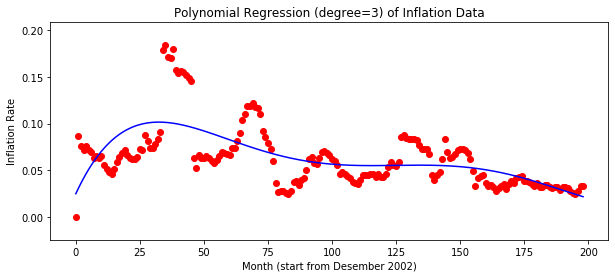

0.4057875497315271


In [58]:
polyreg5 = PolynomialFeatures(degree=5)
X_poly = polyreg5.fit_transform(X2)

linreg5 = LinearRegression()
linreg5.fit(X_poly, y)
y_pred = linreg5.predict(X_poly)

plt.figure(figsize=(10,4))
plt.scatter(X2, y, color='red')
plt.plot(X2, y_pred, color='blue')
plt.title('Polynomial Regression (degree=3) of Inflation Data')
plt.xlabel('Month (start from Desember 2002)')
plt.ylabel('Inflation Rate')
plt.show()
print(r2_score(y,y_pred))

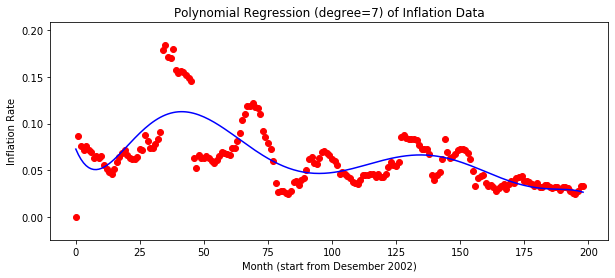

0.5055738171236315


In [57]:
polyreg7 = PolynomialFeatures(degree=7)
X_poly = polyreg7.fit_transform(X2)

linreg7 = LinearRegression()
linreg7.fit(X_poly, y)
y_pred = linreg7.predict(X_poly)

plt.figure(figsize=(10,4))
plt.scatter(X2, y, color='red')
plt.plot(X2, y_pred, color='blue')
plt.title('Polynomial Regression (degree=7) of Inflation Data')
plt.xlabel('Month (start from Desember 2002)')
plt.ylabel('Inflation Rate')
plt.show()
print(r2_score(y,y_pred))